# Creating a dataframe from the readings


As the OPLA throughout the entire stay was operating correctly, its timeseries data will form the basis for our data manage as it contains the whole week measurements.

If you want to add any aditional files make sure that it is included in the file_names list. change the value name in the given file for the name you want the variable to be displayed as.

As the millisecond reading for each variable is different, its important to filter the time values so they're only shown untill the last second.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
file_names = ["inside_temperature.csv", "inside_humidity.csv", "window_position.csv", "outside_temperature.csv",
              "opla_outside_temperature.csv"]

# Read the initial file
df = pd.read_csv('Opla_outside_humidty.csv')

# Convert the time column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Extract time until the last second
df['time'] = df['time'].dt.strftime('%Y-%m-%dT%H:%M:%S')

# Loop through each file and merge the data
for file_name in file_names:
    # Read the additional file
    temp_df = pd.read_csv(file_name)

    # Convert the time column to datetime type
    temp_df['time'] = pd.to_datetime(temp_df['time'])

    # Extract time until the last second
    temp_df['time'] = temp_df['time'].dt.strftime('%Y-%m-%dT%H:%M:%S')

    # Merge the data based on the common time column
    df = pd.merge(df, temp_df, on='time', how='left')

# Print the results of the DataFrame
print(df)

                       time  opla_outside_humidity  inside_temperature  \
0       2023-04-25T09:23:29              37.975285                 NaN   
1       2023-04-25T09:23:30              37.978104                 NaN   
2       2023-04-25T09:23:31              38.093735                 NaN   
3       2023-04-25T09:23:32              37.896317                 NaN   
4       2023-04-25T09:23:33              37.752487                 NaN   
...                     ...                    ...                 ...   
357839  2023-04-28T13:29:39              36.201351                 NaN   
357840  2023-04-28T13:29:40              36.229553                 NaN   
357841  2023-04-28T13:29:41              36.291599                 NaN   
357842  2023-04-28T13:29:42              36.387486                 NaN   
357843  2023-04-28T13:29:43              36.528500                 NaN   

        inside_humidity  window_position  outside_temperature  \
0                   NaN              NaN      

# Cleaning the data

# Fixing the outside temperature data

We should clean the outliers values and we remove the big jumps in the data because the temperature changes slowly.

In [ ]:
df["outside_temperature"] = df["outside_temperature"].mask(df["outside_temperature"] < 0)
df["outside_temperature"] = df["outside_temperature"].mask(df["outside_temperature"] > 50)
df["outside_temperature"] = df["outside_temperature"].mask(abs(df["outside_temperature"].diff()) > 1, np.nan)
df["outside_temperature"] = df["outside_temperature"].mask(abs(df["outside_temperature"].diff(periods=-1)) > 1, np.nan)

# Fixing the inside temperature data

We should clean the outliers values and we remove the big jumps in the data because the temperature changes slowly.

In [ ]:
df["inside_temperature"] = df["inside_temperature"].mask(df["inside_temperature"] < 15)
df["inside_temperature"] = df["inside_temperature"].mask(df["inside_temperature"] > 30)
df["inside_temperature"] = df["inside_temperature"].mask(abs(df["inside_temperature"].diff()) > 1, np.nan)
df["inside_temperature"] = df["inside_temperature"].mask(abs(df["inside_temperature"].diff(periods=-1)) > 1, np.nan)

# Fixing inside humidity data

Here only the big jumps was taken out

In [ ]:
df["inside_humidity"] = df["inside_humidity"].mask(abs(df["inside_humidity"].diff()) > 1, np.nan)
df["inside_humidity"] = df["inside_humidity"].mask(abs(df["inside_humidity"].diff(periods=-1)) > 1, np.nan)

# Fixing window position readings

The window has 3 positions:


*   0: Closed
*   1: Tilt open
*   2: Fully open




In [ ]:
decimals = pd.Series([0], index=['window_position'])
df = df.round(decimals)

# Fixing Opla outside temperature data

Remove big jumps from data

In [ ]:
df["opla_outside_temperature"] = df["opla_outside_temperature"].mask(abs(df["opla_outside_temperature"].diff()) > 1, np.nan)
df["opla_outside_temperature"] = df["opla_outside_temperature"].mask(abs(df["opla_outside_temperature"].diff(periods=-1)) > 1, np.nan)

# Fixing Opla outside humidity data

Remove big jumps from data

In [ ]:
df["opla_outside_humidity"] = df["opla_outside_humidity"].mask(abs(df["opla_outside_humidity"].diff()) > 1, np.nan)
df["opla_outside_humidity"] = df["opla_outside_humidity"].mask(abs(df["opla_outside_humidity"].diff(periods=-1)) > 1, np.nan)

# Optimizing the amount of data

In order to further reduce the size of our dataset and in order to be able to visualize it, instead of displaying the readings every second, the readings will be displayed every minute and their corresponding value will be the average of the readings over that minute.

In [ ]:
# Convert the "time" column to datetime format
df["time"] = pd.to_datetime(df["time"])

# Set the "time" column as the DataFrame index
df = df.set_index("time")

# Resample the DataFrame to 1-minute intervals and calculate the mean
df= df.resample("1T").mean()

# round data to manageable size (one decimal length)
decimals = pd.Series([1, 1, 1, 1, 1], index=['opla_outside_humidity','inside_temperature','inside_humidity', 'outside_temperature', 'opla_outside_temperature'])
df = df.round(decimals)
# fix wndow position data
decimals = pd.Series([0], index=['window_position'])
df = df.round(decimals)

# Reset the index to make the "time" column a regular column again
df= df.reset_index()

# Discard data that was recorded in the system testing stage
from_ts = '2023-04-25 09:23:00'
to_ts = '2023-04-25 17:00:00'
df = df[(df['time'] < from_ts) | (df['time'] > to_ts)]

# Verify the resampled DataFrame
print(df)

                    time  opla_outside_humidity  inside_temperature  \
458  2023-04-25 17:01:00                   41.8                23.1   
459  2023-04-25 17:02:00                   41.9                23.1   
460  2023-04-25 17:03:00                   42.0                23.1   
461  2023-04-25 17:04:00                   42.4                23.1   
462  2023-04-25 17:05:00                   42.9                23.1   
...                  ...                    ...                 ...   
4562 2023-04-28 13:25:00                   36.0                 NaN   
4563 2023-04-28 13:26:00                   35.9                 NaN   
4564 2023-04-28 13:27:00                   36.2                 NaN   
4565 2023-04-28 13:28:00                   36.2                 NaN   
4566 2023-04-28 13:29:00                   36.2                 NaN   

      inside_humidity  window_position  outside_temperature  \
458              19.1              0.0                 13.7   
459              19.4

# Saving the cleaned data to a new file

In [ ]:
# saving the cleaned dataframe into a new file
df.to_csv("cleaned.csv", index=False)

# INSIDE TEMPERATURE depending on WINDOW POSITION




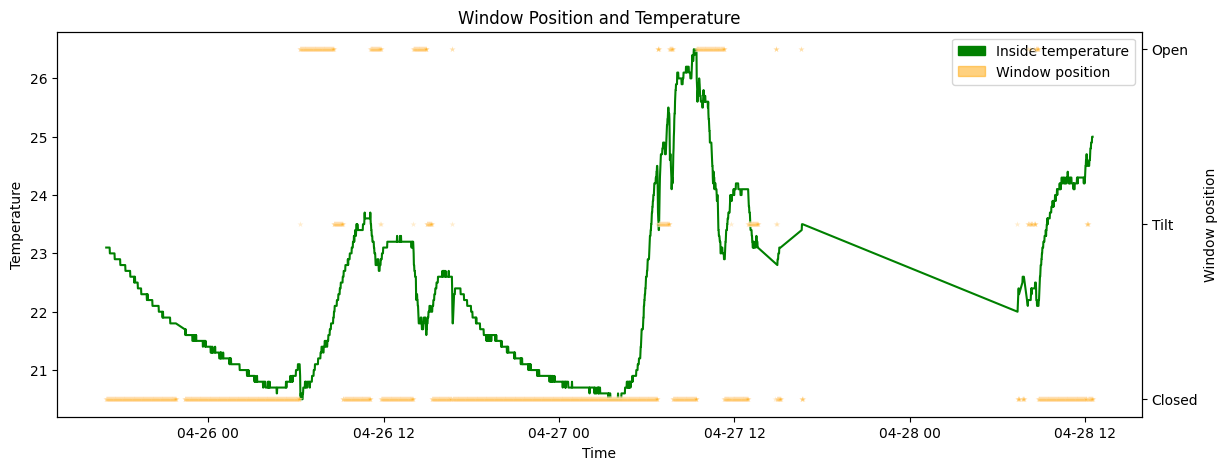

In [ ]:
# Plotting window position and temperature using Seaborn package
fig, ax = plt.subplots(figsize=(14, 5))

#Create first axis plot
sns.lineplot(data = df, x = 'time', y = 'inside_temperature', color = "green")

#Set plot parameters
ax2 = plt.twinx()
ax2.grid(False)
ax2.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set(xlabel='Time', ylabel='Temperature')
ax2.set(xlabel='Time', ylabel='Window position')
plt.yticks([0, 1, 2], ['Closed', 'Tilt', 'Opened'])
plt.title('Window Position and Temperature')

#Create second axis plot
sns.scatterplot(data = df, x = 'time', y = 'window_position', ax = ax2, marker='*', s = 20, color = "orange",alpha = 0.2)

#Legend parameters
green_patch =mpatches.Patch(color='green', label='Inside temperature')
orange_patch = mpatches.Patch(color='orange', label='Window position',alpha = 0.5)
ax.legend(handles=[green_patch,orange_patch])

Search for correlation

<Axes: title={'center': 'Window Position and Temperature change'}, xlabel='Temperature change', ylabel='Window position'>

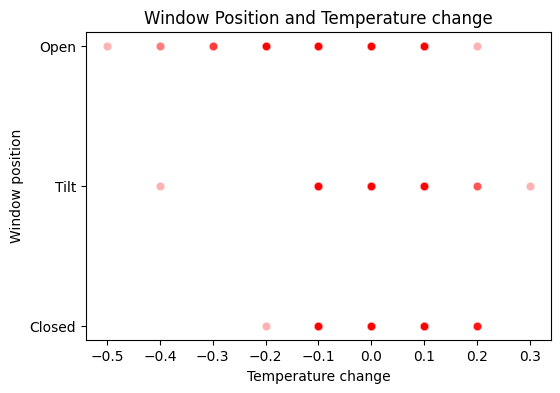

In [ ]:
#Set plot size
fig, ax = plt.subplots(figsize=(6, 4))
plt.yticks([0, 1, 2], ['Closed', 'Tilt', 'Open'])
ax.set(xlabel='Temperature change', ylabel='Window position')
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.title('Window Position and Temperature change')

#Calculate humidity change
df['change_in_temp'] = df["inside_temperature"].diff()

#Create plot
sns.scatterplot(data=df, y='window_position', x='change_in_temp', alpha = 0.3, color = 'red')


# INSIDE HUMIDITY depending on WINDOW POSITION


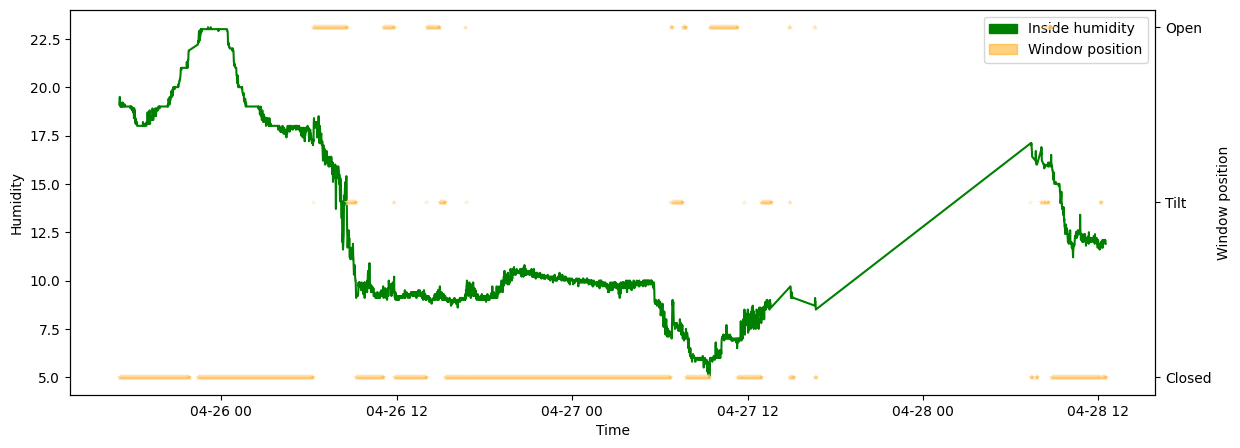

In [ ]:
#Set plot size
fig, ax = plt.subplots(figsize=(14, 5))

#Create first axis plot
sns.lineplot(data = df, x = 'time', y = 'inside_humidity', color = "green")

#Set plot parameters
ax2 = plt.twinx()
ax2.grid(False)
ax2.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set(xlabel='Time', ylabel='Humidity')
ax2.set(xlabel='Time', ylabel='Window position')
plt.yticks([0, 1, 2], ['Closed', 'Tilt', 'Open'])

#Create second axis plot
sns.scatterplot(data = df, x = 'time', y = 'window_position', ax = ax2, marker='*', s = 20, color = "orange",alpha = 0.2)

#Legend parameters
green_patch =mpatches.Patch(color='green', label='Inside humidity')
orange_patch = mpatches.Patch(color='orange', label='Window position',alpha = 0.5)
ax.legend(handles=[green_patch,orange_patch])

Search for correlation

<Axes: title={'center': 'Window Position and Humidity change'}, xlabel='Humidity change', ylabel='Window position'>

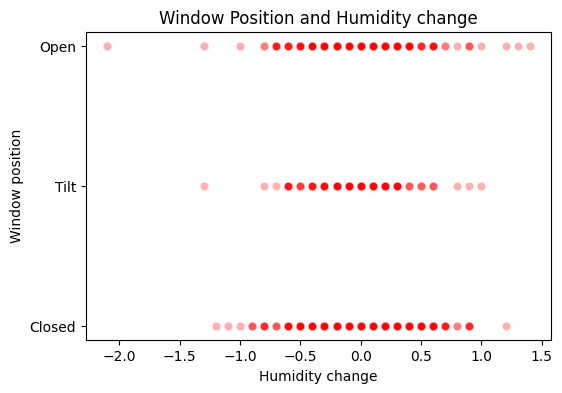

In [ ]:
#Set plot parameters
fig, ax = plt.subplots(figsize=(6, 4))
plt.yticks([0, 1, 2], ['Closed', 'Tilt', 'Open'])
ax.set(xlabel='Humidity change', ylabel='Window position')
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.title('Window Position and Humidity change')

#Calculate humidity change
df['change_in_humidity'] = df["inside_humidity"].diff()

#Create plot
sns.scatterplot(data=df, y='window_position', x='change_in_humidity', alpha = 0.3, color = 'red')

# Outside temperature and humidity

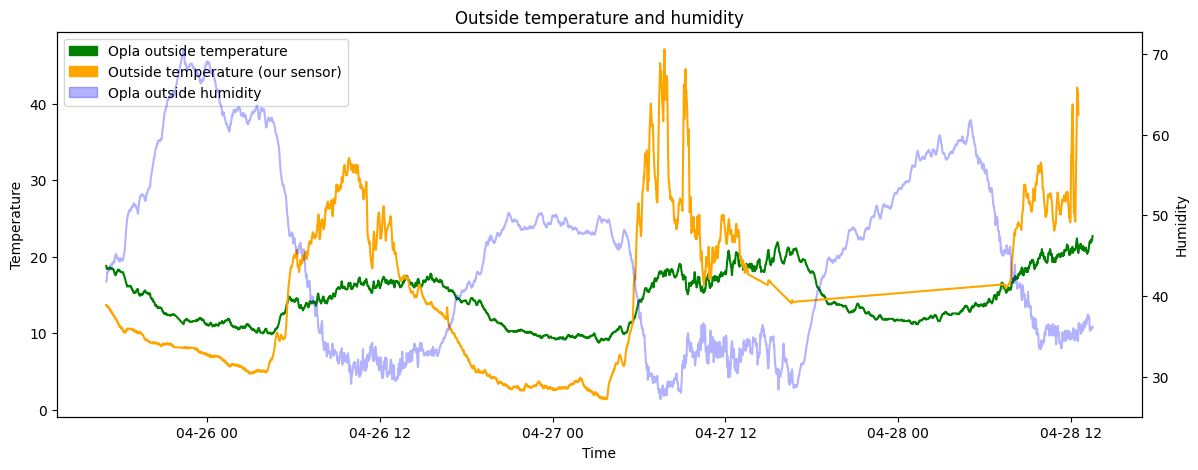

In [ ]:
#Create second axis and plot parameters
fig, ax = plt.subplots(figsize=(14, 5))
ax2 = plt.twinx()
ax2.grid(False)
ax.set(xlabel='Time', ylabel='Temperature')
ax2.set(xlabel='Time', ylabel='Humidity')
plt.title('Outside temperature and humidity')

#Plotting
out_temp_opla = sns.lineplot(data = df, x = 'time', y = 'opla_outside_temperature', color = "green", ax = ax)
out_temp = sns.lineplot(data = df, x = 'time', y = 'outside_temperature', color = "orange",ax = ax)
out_humidity = sns.lineplot(data = df, x = 'time', y = 'opla_outside_humidity', color = "blue", alpha = 0.3, ax = ax2)

#Legend parameters
green_patch =mpatches.Patch(color='green', label='Opla outside temperature')
orange_patch = mpatches.Patch(color='orange', label='Outside temperature (our sensor)')
blue_patch = mpatches.Patch(color='blue', label='Opla outside humidity',alpha = 0.3)
ax.legend(handles=[green_patch,orange_patch,blue_patch])

# Difference between our measurements and Opla weather station measurments

<Axes: title={'center': 'Difference in the measured temperatures'}, xlabel='Time', ylabel='Difference'>

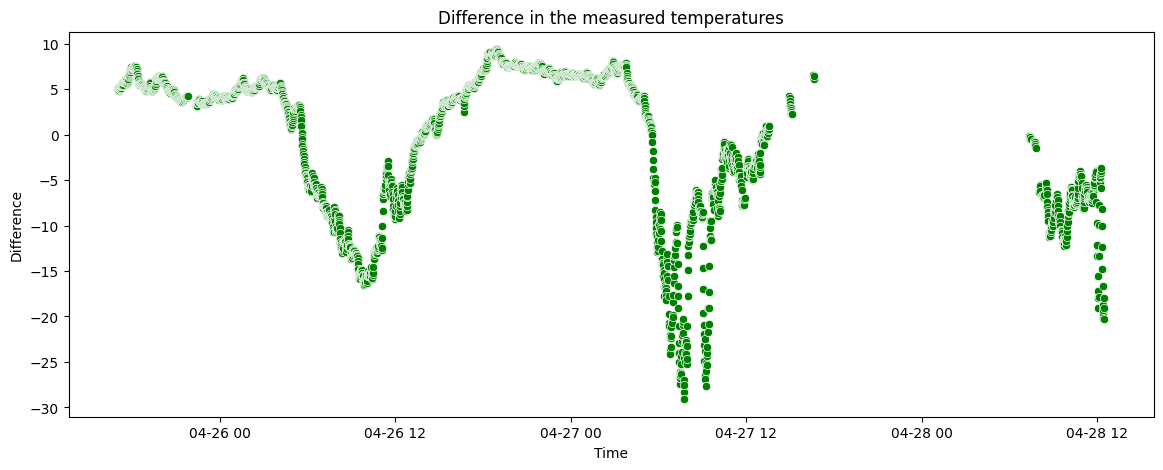

In [ ]:
#Calculate the difference
df['temp_2m_diff'] = df['opla_outside_temperature']-df['outside_temperature']
#Set plot parameters
fig, ax = plt.subplots(figsize=(14, 5))
ax.set(xlabel='Time', ylabel='Difference')
plt.title('Difference in the measured temperatures')

#Create plot
sns.scatterplot(data = df, x = 'time', y = 'temp_2m_diff', color = "green")

# Outside and inside temperature

Text(0.5, 1.0, 'In and outside temperatures')

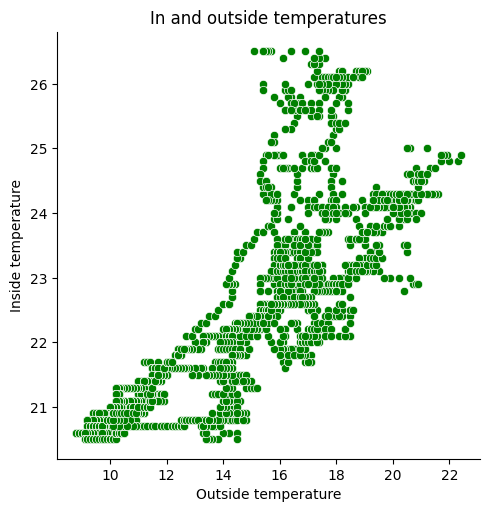

In [ ]:
#Set plot parameters and plot
sns.relplot(data = df, x = 'opla_outside_temperature', y = 'inside_temperature', color = "green")
plt.xlabel('Outside temperature')
plt.ylabel('Inside temperature')
plt.title('In and outside temperatures')


# Outside temperature and outside humidity

Text(0.5, 1.0, 'Temperature and humidity')

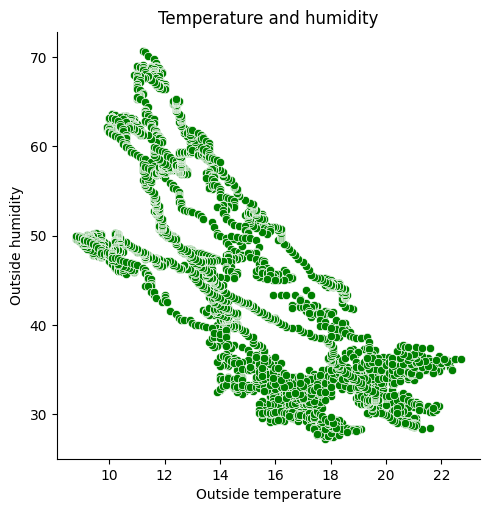

In [ ]:
#Set plot parameters and plot
sns.relplot(data = df, x = 'opla_outside_temperature', y = 'opla_outside_humidity', color = "green")
plt.xlabel('Outside temperature')
plt.ylabel('Outside humidity')
plt.title('Temperature and humidity')

## Thermal Zone Prediction

##### Using computer vision package, it is possible to convert the pixels of a picture to an array. This array is stored in a numpy array.

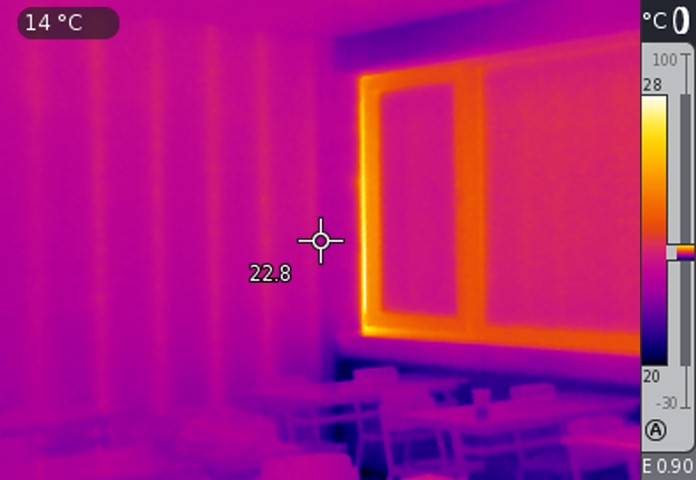

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('window_thermal_frame_original.JPG')
cv2_imshow(img)

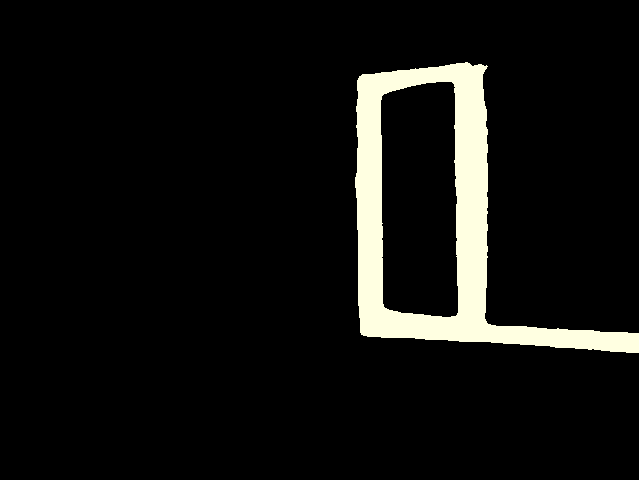

In [ ]:
# Load an image
img = cv2.imread('window_thermal_frame_croped.jpg')

# Convert the image to a numpy array
img_array = np.array(img, dtype=np.float32)

# Reshape the array into a 2D array of pixels
pixel_data = img_array.reshape((-1, 3))

# Perform k-means clustering with K clusters
_, labels, centers = cv2.kmeans(pixel_data, K=5, bestLabels=None, criteria=(
    cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
    attempts=10,
    flags=cv2.KMEANS_RANDOM_CENTERS)

# Reshape the 'labels' array back into the shape of the input image
labels = labels.reshape(img.shape[0], img.shape[1])

# Display the output image with different colors for each cluster
output_image = np.zeros(img.shape, dtype=np.uint8)

# Find the cluster whose center is closest to yellow ([0, 255, 255])
distances = np.linalg.norm(centers - np.array([0, 100, 255]), axis=1)

# Assign the pixels to the appropriate cluster
output_image[labels == np.argmin(distances)] = (225, 255, 255)

# show the output
cv2_imshow(output_image)